# Deep Learning Fundamentals

## Colab environment

In [0]:
!python --version

Python 3.6.9


In [0]:
!pip list | grep tensor

tensorboard              2.2.0          
tensorboard-plugin-wit   1.6.0.post2    
tensorboardcolab         0.0.22         
tensorflow               2.2.0rc2       
tensorflow-addons        0.8.3          
tensorflow-datasets      2.1.0          
tensorflow-estimator     2.2.0rc0       
tensorflow-gcs-config    2.1.8          
tensorflow-hub           0.7.0          
tensorflow-metadata      0.21.1         
tensorflow-privacy       0.2.2          
tensorflow-probability   0.9.0          


In [0]:
!pip list | grep torch

torch                    1.4.0          
torchsummary             1.5.1          
torchtext                0.3.1          
torchvision              0.5.0          


In [0]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Basic numerical computing

In [0]:
import numpy as np

X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [0]:
X.shape, X.dtype

((3, 2), dtype('float64'))

In [0]:
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [0]:
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [0]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [0]:
x = np.array([10, 20])
print(X.shape, x.shape)
X + x

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [0]:
X.shape, x.shape

((3, 2), (2,))

In [0]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [0]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [0]:
X = np.random.rand(3, 2)
X

array([[0.36687933, 0.38629929],
       [0.94626216, 0.21752516],
       [0.7960545 , 0.42029364]])

In [0]:
X > 0.5

array([[False, False],
       [ True, False],
       [ True, False]])

In [0]:
X[X > 0.5] = 1
X

array([[0.36687933, 0.38629929],
       [1.        , 0.21752516],
       [1.        , 0.42029364]])

## Basic plotting

In [0]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

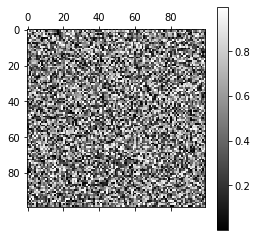

In [0]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

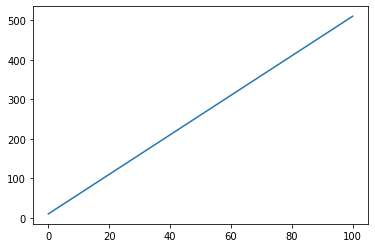

In [0]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x*w + b

plt.plot(x, y)

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


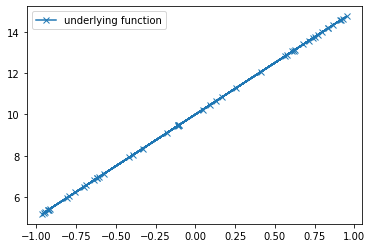

In [0]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

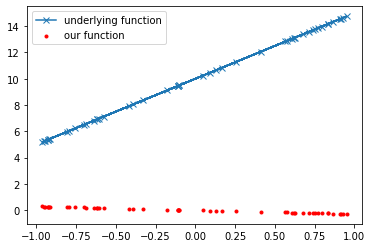

In [0]:
# Let's initialize our predictions
class Linear:
  def __init__(self, num_input, num_output=1):
    # The initialization is actually quite important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
    self.bias = np.zeros((1))
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

In [0]:
# How wrong is this exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 111.64805225897379


In [0]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) - 0.5
    self.bias = np.random.randn(1) - 0.5
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    # print('Linear forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [0]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

95.18612844126056
62.96521040979328


Epoch 0, loss 138.94648949188814
Epoch 5, loss 19.949879332526873
Epoch 10, loss 4.121450946081365
Epoch 15, loss 1.221022710492333
Epoch 20, loss 0.437254117094543
Epoch 25, loss 0.16734217583491734
Epoch 30, loss 0.06531204710251294
Epoch 35, loss 0.02563055294903541
Epoch 40, loss 0.010073384849842302
Epoch 45, loss 0.00396069464358966
Epoch 50, loss 0.0015574569043165412
Epoch 55, loss 0.0006124547714051519


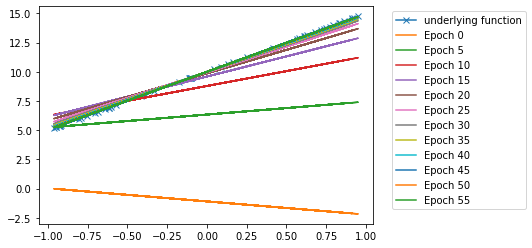

In [0]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


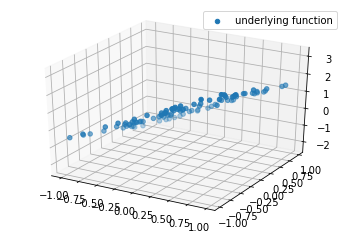

In [0]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

4.049592493668105


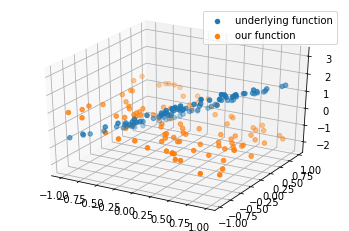

In [0]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 0.2629248057380586
Epoch 1, loss 0.2316748857673798
Epoch 2, loss 0.20414684869574523
Epoch 3, loss 0.1798951047746505
Epoch 4, loss 0.15852818433306312
Epoch 5, loss 0.13970189514390524
Epoch 6, loss 0.12311343904214817
Epoch 7, loss 0.1084963215220159
Epoch 8, loss 0.09561592657875458
Epoch 9, loss 0.08426565626117653
Epoch 10, loss 0.07426355404556297
Epoch 11, loss 0.0654493456843627
Epoch 12, loss 0.05768184222677318
Epoch 13, loss 0.05083665850587314
Epoch 14, loss 0.04480420723696423
Epoch 15, loss 0.03948793444280725
Epoch 16, loss 0.03480276653250814
Epoch 17, loss 0.030673743232910916
Epoch 18, loss 0.02703481386075536
Epoch 19, loss 0.02382777724364701
Epoch 20, loss 0.021001348031964115
Epoch 21, loss 0.0185103342560343
Epoch 22, loss 0.016314912823063535
Epoch 23, loss 0.014379991256133895
Epoch 24, loss 0.012674645385492582
Epoch 25, loss 0.011171623937158051
Epoch 26, loss 0.009846912048130903
Epoch 27, loss 0.008679346690387462
Epoch 28, loss 0.00765027782

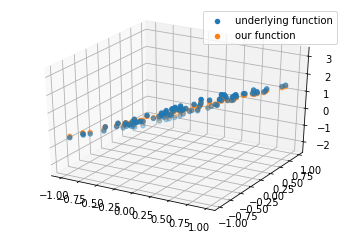

In [0]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=mse, lr=0.1, num_epochs=30)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


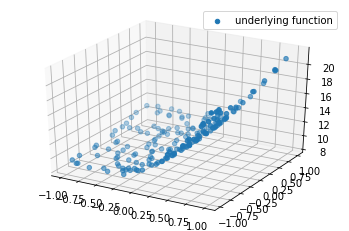

In [0]:
# Okay, so multi-dimensional inputs still work.
# What about non-linear functions?

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 152.93503855212424
Epoch 1, loss 101.11743022751241
Epoch 2, loss 67.71167011698638
Epoch 3, loss 46.110106324750916
Epoch 4, loss 32.084115376231004
Epoch 5, loss 22.926633761913443
Epoch 6, loss 16.903858942624282
Epoch 7, loss 12.90463089002037
Epoch 8, loss 10.216210933633688
Epoch 9, loss 8.38088094288531
Epoch 10, loss 7.1042216797043185
Epoch 11, loss 6.196437748746676
Epoch 12, loss 5.534815495496093
Epoch 13, loss 5.03969613222078
Epoch 14, loss 4.659093113001726
Epoch 15, loss 4.358839013556365
Epoch 16, loss 4.1162701021043295
Epoch 17, loss 3.916174798098354
Epoch 18, loss 3.7481913280248103
Epoch 19, loss 3.605133463737352
Epoch 20, loss 3.4819109621339783
Epoch 21, loss 3.3748313818420024
Epoch 22, loss 3.2811467357918205
Epoch 23, loss 3.1987575509743555
Epoch 24, loss 3.1260183246307975
Epoch 25, loss 3.061608468516526
Epoch 26, loss 3.0044456984827788
Epoch 27, loss 2.9536270635306097
Epoch 28, loss 2.908388084480499
Epoch 29, loss 2.8680738539868424
Epoc

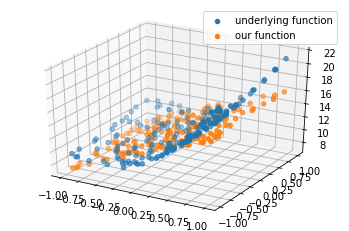

In [0]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

In [0]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()
      self.input_gradient = np.clip(self.input_, 0, None) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1.  ]
 [ 0.25]
 [ 0.  ]
 [-0.  ]
 [-0.  ]]


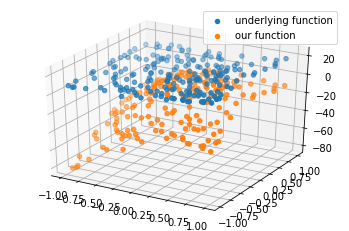

In [0]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 100)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss)
plot_3d(x, y_true, y_pred)

In [0]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

177.83983860363116
109.80351851137806


Epoch 0, loss 109.80351851137806
Epoch 1, loss 73.36221380400738
Epoch 2, loss 49.88448982414873
Epoch 3, loss 34.56345042482203
Epoch 4, loss 24.253787614538023
Epoch 5, loss 16.80730258461417
Epoch 6, loss 10.787414784862383
Epoch 7, loss 6.407912929714054
Epoch 8, loss 4.345663764907709
Epoch 9, loss 3.467359258575067
Epoch 10, loss 2.5098462206059433
Epoch 11, loss 1.7563773661058315
Epoch 12, loss 1.1664957470814061
Epoch 13, loss 0.8272012657275579
Epoch 14, loss 0.651168163852824
Epoch 15, loss 0.5668265418841172
Epoch 16, loss 0.5247752048160335
Epoch 17, loss 0.5007805193799232
Epoch 18, loss 0.48574338896561825
Epoch 19, loss 0.4745160713998905


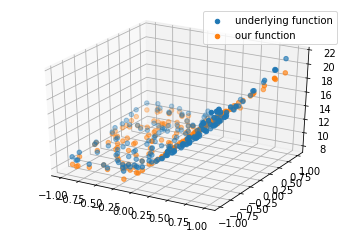

In [0]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, model(x))

Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 49.8790
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 5.7337
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 3.9201
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 7.2878
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2328
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 2.2188
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 1.3760
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2180
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1992


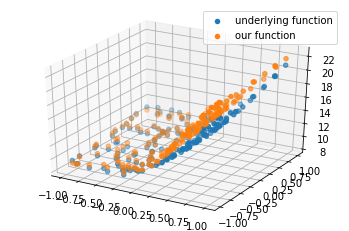

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

## Next time

We will use keras to work on a classification task, and we will see how to do the same in PyTorch.